In [4]:
import pandas as pd
from pathlib import Path

In [57]:
mtg_data_path = str(Path('archive/all_mtg_cards.csv').resolve())

In [58]:
mtg_cards = pd.read_csv(mtg_data_path,low_memory=False)
mtg_cards.head()  # Display the first few rows of the DataFrame

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['W'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382


In [59]:
mtg_cards.shape

(93643, 39)

##### qualidade dos dados


In [60]:
pd.DataFrame(mtg_cards.isnull().sum()).sort_values(by=0, ascending=True)  # Display null values in each column

,0
name,0
layout,0
cmc,0
type,0
rarity,0
number,0
printings,0
set_name,0
id,0
set,0


In [61]:
empty_columns = mtg_cards.columns[mtg_cards.isnull().sum() == len(mtg_cards)]   # Identify columns that are completely empty
mtg_cards.drop(columns=empty_columns, inplace=True)  # Drop empty columns

In [62]:
pd.DataFrame(mtg_cards.isnull().sum()).sort_values(by=0, ascending=True)

,0
name,0
layout,0
type,0
cmc,0
number,0
rarity,0
set_name,0
set,0
printings,0
id,0


selecionado colunas

In [63]:
mtg_columns = ['name','layout','mana_cost','cmc','colors','color_identity','type','supertypes', 'subtypes', 'rarity', 'artist','power','toughness','loyalty','printings','original_text','set_name','set']

In [64]:
mtg_filtered = mtg_cards[mtg_columns]  # Filter the DataFrame to keep only the specified columns
mtg_filtered.head()  # Display the first few rows of the filtered DataFrame

,name,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,rarity,artist,power,toughness,loyalty,printings,original_text,set_name,set
0,Ancestor's Chosen,normal,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,"['Human', 'Cleric']",Uncommon,Pete Venters,4,4,NaN,"['10E', 'JUD', 'UMA']",First strike\nWhen Ancestor's Chosen comes int...,Tenth Edition,10E
1,Ancestor's Chosen,normal,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,"['Human', 'Cleric']",Uncommon,Pete Venters,4,4,NaN,"['10E', 'JUD', 'UMA']",NaN,Tenth Edition,10E
2,Angel of Mercy,normal,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,['Angel'],Uncommon,Volkan Baǵa,3,3,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...","Flying\nWhen Angel of Mercy comes into play, y...",Tenth Edition,10E
3,Angel of Mercy,normal,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,['Angel'],Uncommon,Volkan Baǵa,3,3,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,Tenth Edition,10E
4,Angelic Blessing,normal,{2}{W},3.0,['W'],['W'],Sorcery,NaN,NaN,Common,Mark Zug,NaN,NaN,NaN,"['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Tenth Edition,10E


Limpeza de dados

### Name

### Mana Cost


In [65]:
mtg_filtered['mana_cost'].unique()

array(['{5}{W}{W}', '{4}{W}', '{2}{W}', '{3}{W}{W}', '{1}{W}',
       '{1}{W}{W}', '{3}{W}', '{W}', '{5}{W}', '{2}{W}{W}', '{X}{W}',
       '{6}{W}{W}{W}', '{W}{W}', '{1}{U}{U}', '{3}{U}{U}', '{3}{U}{U}{U}',
       '{1}{U}', '{3}{U}', '{U}{U}', '{2}{U}', '{U}', '{6}{U}{U}',
       '{2}{U}{U}', '{4}{U}{U}', '{4}{U}', '{8}{U}{U}', '{2}{B}',
       '{2}{B}{B}', '{4}{B}{B}', '{3}{B}{B}', '{3}{B}', '{X}{1}{B}',
       '{1}{B}', '{B}', '{B}{B}', '{4}{B}', '{1}{B}{B}{B}', '{1}{B}{B}',
       '{4}{B}{B}{B}', '{X}{2}{B}', '{5}{B}', '{3}{B}{B}{B}{B}',
       '{7}{B}{B}', '{B}{B}{B}', '{3}{R}', '{2}{R}', '{3}{R}{R}',
       '{X}{R}', '{6}{R}{R}', '{4}{R}{R}', '{R}', '{1}{R}',
       '{X}{2}{R}{R}', '{1}{R}{R}{R}', '{2}{R}{R}', '{1}{R}{R}', '{4}{R}',
       '{R}{R}{R}', '{5}{R}{R}', '{3}{R}{R}{R}', '{5}{R}{R}{R}',
       '{2}{G}{G}', '{1}{G}', '{6}{G}{G}', '{G}', '{2}{G}', '{4}{G}{G}',
       '{3}{G}{G}', '{1}{G}{G}', '{3}{G}', '{6}{G}', '{X}{G}',
       '{4}{G}{G}{G}', '{2}{G}{G}{G}', '{4}{G}', '

In [66]:
mtg_filtered.loc[:, 'mana_cost'] = mtg_filtered['mana_cost'].str.replace(r'[{}//]','', regex=True)  # Remove curly braces and slashes from mana_cost

In [67]:
mtg_filtered['mana_cost'].unique()

array(['5WW', '4W', '2W', '3WW', '1W', '1WW', '3W', 'W', '5W', '2WW',
       'XW', '6WWW', 'WW', '1UU', '3UU', '3UUU', '1U', '3U', 'UU', '2U',
       'U', '6UU', '2UU', '4UU', '4U', '8UU', '2B', '2BB', '4BB', '3BB',
       '3B', 'X1B', '1B', 'B', 'BB', '4B', '1BBB', '1BB', '4BBB', 'X2B',
       '5B', '3BBBB', '7BB', 'BBB', '3R', '2R', '3RR', 'XR', '6RR', '4RR',
       'R', '1R', 'X2RR', '1RRR', '2RR', '1RR', '4R', 'RRR', '5RR',
       '3RRR', '5RRR', '2GG', '1G', '6GG', 'G', '2G', '4GG', '3GG', '1GG',
       '3G', '6G', 'XG', '4GGG', '2GGG', '4G', '5GGG', '2', '3', '4', '1',
       '5', '9', '6', '0', '7', nan, 'WWW', '3WWW', 'XUU', 'XU', '5U',
       'XUUU', '3BBB', 'XB', 'BBBB', 'RR', 'XRR', 'GG', '2GGGG', '3GGG',
       '15', '10', '11', '5BBB', 'BP', '5R', '9R', '5GG', '5G', '7GGG',
       'WBG', '2WU', 'UB', 'WUB', '1WB', 'GUR', '4UR', '4WWBB', '1BRBRBR',
       'BG', 'RG', '1RGW', '1BR', '2RRWW', '2RWRWRW', 'GWU', '2GUR',
       '2BR', '2RG', '1UR', '1RGRGRG', '2GU', '3GU', 'RGRG

In [68]:
mtg_filtered['mana_cost'].value_counts()

mana_cost
1W       2650
1G       2383
2G       2325
2R       2316
1U       2229
         ... 
5BGBG       1
HW          1
X2GG        1
XWBG        1
1RGWU       1
Name: count, Length: 746, dtype: int64

In [69]:
# Ordenar os caracteres de cada string na coluna 'mana_cost'
mtg_filtered.loc[:,'mana_cost'] = mtg_filtered['mana_cost'].apply(lambda x: ''.join(sorted(str(x))) if pd.notnull(x) else x)
mtg_filtered['mana_cost'].value_counts()

mana_cost
1W       2650
1G       2383
2G       2325
2R       2316
1U       2229
         ... 
6CC         1
HW          1
2GGX        1
BGWX        1
1GRUW       1
Name: count, Length: 689, dtype: int64

### CMC


In [70]:
mtg_filtered['cmc']

0        7.0
1        7.0
2        5.0
3        5.0
4        3.0
        ... 
93638    2.0
93639    1.0
93640    2.0
93641    3.0
93642    3.0
Name: cmc, Length: 93643, dtype: float64

In [75]:
mtg_filtered['cmc'].describe()

count      93643.000000
mean          24.356359
std         4621.402101
min            0.000000
25%            2.000000
50%            3.000000
75%            4.000000
max      1000000.000000
Name: cmc, dtype: float64

In [77]:
mtg_filtered[mtg_filtered['cmc'] > 10000]

,name,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,rarity,artist,power,toughness,loyalty,printings,original_text,set_name,set
86490,Gleemax,normal,0000001,1000000.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,Rare,Richard Thomas,NaN,NaN,NaN,['UNH'],You choose all targets for all spells and abil...,Unhinged,UNH
86491,Gleemax,normal,0000001,1000000.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,Rare,Richard Thomas,NaN,NaN,NaN,['UNH'],NaN,Unhinged,UNH


In [72]:

mtg_filtered['cmc'].unique()

array([7.0e+00, 5.0e+00, 3.0e+00, 2.0e+00, 4.0e+00, 1.0e+00, 6.0e+00,
       9.0e+00, 8.0e+00, 1.0e+01, 0.0e+00, 1.5e+01, 1.1e+01, 1.2e+01,
       1.4e+01, 1.6e+01, 1.3e+01, 5.0e-01, 1.0e+06])

<Axes: >

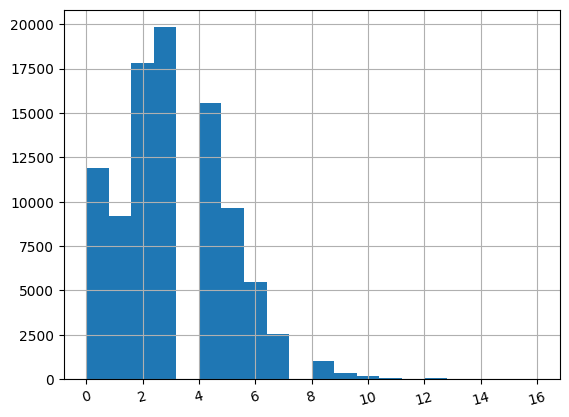

In [91]:
mtg_filtered[mtg_filtered['cmc']<1000000]['cmc'].hist(bins=20,xrot=15)  # Plot a histogram of the cmc values

##### Comparando Mana cost com CMD

In [14]:
def cmd(mana_cost_str):
    if pd.isna(mana_cost_str):
        return 0
    if mana_cost_str.isdigit():
        return float(mana_cost_str)
    return sum(int(c) if c.isdigit() else 1 for c in str(mana_cost_str))


In [ ]:
cmd("0000000000000000000")

0.0

: 